Exploratory analysis of releasing particles near a topographic boundary

To characterize the interaction of the flow with a complex topography like a coral reef, I am going to release particles near the boundary and track them forwards and backwards in time. This notebook is designed to outline a structure for the study.
First let's import the necessary modules

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, ScipyParticle, AdvectionRK4, ErrorCode, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta
from netCDF4 import Dataset
from explfunctions import deleteparticle

ModuleNotFoundError: No module named 'parcels._version'

Now we are going to obtain flowfields in netcdf form

In [22]:
filenames = {'U': 'output-corals-regridded.nc',
             'V': 'output-corals-regridded.nc'}
variables = {'U': 'U',
             'V': 'V'}
dimensions = {'lon':'X',
              'lat':'Y'}
timestamps = [[i for i in range(61)]]
timestamps = np.array(timestamps)
timestamps.size

61

In [18]:
for var, name in variables.items():
    # Resolve all matching paths for the current variable
    paths = filenames[var] if type(filenames) is dict and var in filenames else filenames
    if type(paths) is not dict:
        paths = FieldSet.parse_wildcards(paths, filenames, var)
if timestamps is not None:
    if isinstance(timestamps, list):
        timestamps = np.array(timestamps)
    timestamps = np.reshape(timestamps, [timestamps.size, 1])

In [19]:
len(paths)

1

In [20]:
timestamps.shape

(61, 1)

In [11]:
fieldset = FieldSet.from_netcdf(filenames,variables,dimensions,timestamps=tstamp)

AssertionError: Number of files and number of timestamps must be equal.

In [24]:
filenames = 'output-corals-regridded.nc'
cf = Dataset(filenames,'r+',format='netCDF4')
T = cf.variables['T']

To check what the domain of the field is and what kind of velocities we have we are going to show the fields

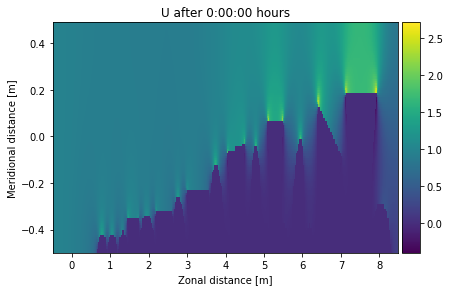

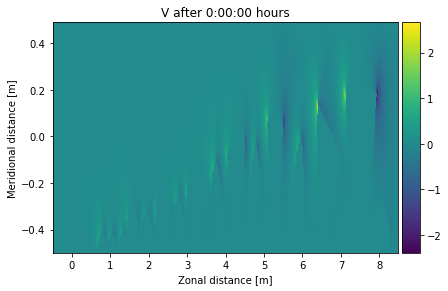

In [5]:
fieldset.U.show()
fieldset.V.show()

As a first test, we are going to release particles near an open boundary.

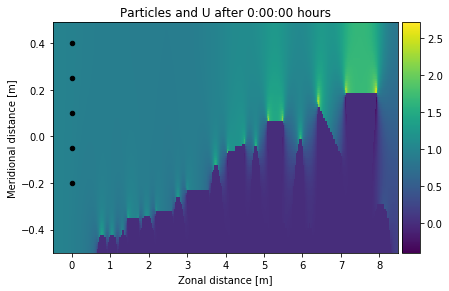

In [23]:
nPart = 5
pset = ParticleSet.from_list(fieldset=fieldset,
                            pclass=ScipyParticle,
                            lon=[0]*nPart,
                            lat=np.linspace(-0.2,0.4,nPart))
pset.show(field=fieldset.U)

In [24]:
pset.execute(AdvectionRK4,
             runtime=timedelta(seconds=60),
             dt=timedelta(seconds=0.01),
             recovery = {ErrorCode.ErrorOutOfBounds:deleteparticle},
             output_file=pset.ParticleFile(name="test8.nc", outputdt=timedelta(seconds=0.01))
            )

N/A% (0 of 60.0) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (3.2599999999999745 of 60.0) |      | Elapsed Time: 0:00:00 ETA:   0:00:02
  5% (3.279999999999974 of 60.0) |       | Elapsed Time: 0:00:00 ETA:   0:00:04
  5% (3.2999999999999736 of 60.0) |      | Elapsed Time: 0:00:00 ETA:   0:00:04
  5% (3.3399999999999728 of 60.0) |      | Elapsed Time: 0:00:00 ETA:   0:00:08
  5% (3.379999999999972 of 60.0) |       | Elapsed Time: 0:00:00 ETA:   0:00:10
  5% (3.419999999999971 of 60.0) |       | Elapsed Time: 0:00:00 ETA:   0:00:12
  5% (3.45999999999997 of 60.0) |        | Elapsed Time: 0:00:00 ETA:   0:00:13
  5% (3.4999999999999694 of 60.0) |      | Elapsed Time: 0:00:00 ETA:   0:00:15
  5% (3.5399999999999685 of 60.0) |      | Elapsed Time: 0:00:01 ETA:   0:00:15
  5% (3.569999999999968 of 60.0) |       | Elapsed Time: 0:00:01 ETA:   0:00:18
  5% (3.5899999999999674 of 60.0) |      | Elapsed Time: 0:00:01 ETA:   0:00:20
  6% (3.619999999999967 of 60.0) |      

Particle 8 has died at t = 4.87999999999994
Particle 9 has died at t = 4.87999999999994
Particle 7 has died at t = 4.88999999999994
Particle 6 has died at t = 4.90999999999994
Particle 5 has died at t = 4.929999999999939


  9% (5.699999999999923 of 60.0) |       | Elapsed Time: 0:00:06 ETA:   0:02:11
 10% (6.079999999999915 of 60.0) |       | Elapsed Time: 0:00:06 ETA:   0:01:08
 10% (6.569999999999904 of 60.0) |       | Elapsed Time: 0:00:06 ETA:   0:01:07


 11% (6.839999999999899 of 60.0) |       | Elapsed Time: 0:00:07 ETA:   0:00:46
 12% (7.329999999999888 of 60.0) |       | Elapsed Time: 0:00:07 ETA:   0:00:45
 12% (7.599999999999882 of 60.0) |       | Elapsed Time: 0:00:07 ETA:   0:00:35


 13% (8.049999999999873 of 60.0) |       | Elapsed Time: 0:00:07 ETA:   0:00:30
 13% (8.359999999999866 of 60.0) |       | Elapsed Time: 0:00:07 ETA:   0:00:30
 14% (8.969999999999853 of 60.0) |#      | Elapsed Time: 0:00:07 ETA:   0:00:24


 15% (9.349999999999845 of 60.0) |#      | Elapsed Time: 0:00:07 ETA:   0:00:22
 16% (9.859999999999834 of 60.0) |#      | Elapsed Time: 0:00:07 ETA:   0:00:22
 17% (10.319999999999824 of 60.0) |#     | Elapsed Time: 0:00:07 ETA:   0:00:18


 17% (10.639999999999818 of 60.0) |#     | Elapsed Time: 0:00:07 ETA:   0:00:17
 18% (11.229999999999805 of 60.0) |#     | Elapsed Time: 0:00:07 ETA:   0:00:16
 19% (11.749999999999794 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:16


 20% (12.159999999999785 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:13
 20% (12.569999999999776 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:13
 21% (12.919999999999769 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:12


 22% (13.30999999999976 of 60.0) |#      | Elapsed Time: 0:00:08 ETA:   0:00:12
 22% (13.679999999999753 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:10
 23% (14.229999999999741 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:10


 24% (14.689999999999731 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:09
 25% (15.18999999999972 of 60.0) |#      | Elapsed Time: 0:00:08 ETA:   0:00:09


 26% (15.749999999999709 of 60.0) |#     | Elapsed Time: 0:00:08 ETA:   0:00:09
 27% (16.31999999999975 of 60.0) |#      | Elapsed Time: 0:00:08 ETA:   0:00:08
 27% (16.709999999999813 of 60.0) |#     | Elapsed Time: 0:00:09 ETA:   0:00:08


 28% (17.289999999999903 of 60.0) |#     | Elapsed Time: 0:00:09 ETA:   0:00:08
 29% (17.76999999999998 of 60.0) |##     | Elapsed Time: 0:00:09 ETA:   0:00:08


 30% (18.17000000000004 of 60.0) |##     | Elapsed Time: 0:00:09 ETA:   0:00:08
 31% (18.700000000000124 of 60.0) |#     | Elapsed Time: 0:00:09 ETA:   0:00:08
 31% (18.99000000000017 of 60.0) |##     | Elapsed Time: 0:00:09 ETA:   0:00:08


 32% (19.400000000000233 of 60.0) |#     | Elapsed Time: 0:00:09 ETA:   0:00:08
 32% (19.750000000000288 of 60.0) |#     | Elapsed Time: 0:00:09 ETA:   0:00:08
 33% (20.250000000000366 of 60.0) |##    | Elapsed Time: 0:00:09 ETA:   0:00:07


 34% (20.880000000000464 of 60.0) |##    | Elapsed Time: 0:00:09 ETA:   0:00:07
 35% (21.270000000000525 of 60.0) |##    | Elapsed Time: 0:00:09 ETA:   0:00:07


 36% (21.840000000000614 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:07
 37% (22.370000000000697 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:07
 37% (22.790000000000763 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:07


 38% (23.22000000000083 of 60.0) |##     | Elapsed Time: 0:00:10 ETA:   0:00:07
 39% (23.550000000000882 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:07
 39% (23.98000000000095 of 60.0) |##     | Elapsed Time: 0:00:10 ETA:   0:00:07
 40% (24.310000000001 of 60.0) |###      | Elapsed Time: 0:00:10 ETA:   0:00:07


 41% (24.720000000001065 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:07
 41% (25.07000000000112 of 60.0) |##     | Elapsed Time: 0:00:10 ETA:   0:00:07


 42% (25.630000000001207 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:06
 43% (26.210000000001298 of 60.0) |##    | Elapsed Time: 0:00:10 ETA:   0:00:06
 44% (26.590000000001357 of 60.0) |##    | Elapsed Time: 0:00:11 ETA:   0:00:06


 45% (27.200000000001452 of 60.0) |##    | Elapsed Time: 0:00:11 ETA:   0:00:06
 45% (27.5000000000015 of 60.0) |###     | Elapsed Time: 0:00:11 ETA:   0:00:06
 46% (27.940000000001568 of 60.0) |##    | Elapsed Time: 0:00:11 ETA:   0:00:06


 47% (28.33000000000163 of 60.0) |###    | Elapsed Time: 0:00:11 ETA:   0:00:06
 48% (28.860000000001712 of 60.0) |##    | Elapsed Time: 0:00:11 ETA:   0:00:06


 48% (29.35000000000179 of 60.0) |###    | Elapsed Time: 0:00:11 ETA:   0:00:06
 49% (29.630000000001832 of 60.0) |##    | Elapsed Time: 0:00:11 ETA:   0:00:06
 50% (30.080000000001903 of 60.0) |###   | Elapsed Time: 0:00:11 ETA:   0:00:06
 50% (30.38000000000195 of 60.0) |###    | Elapsed Time: 0:00:11 ETA:   0:00:06


 51% (30.96000000000204 of 60.0) |###    | Elapsed Time: 0:00:11 ETA:   0:00:06
 52% (31.54000000000213 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05


 53% (31.900000000002187 of 60.0) |###   | Elapsed Time: 0:00:12 ETA:   0:00:05
 53% (32.30000000000214 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05
 54% (32.66000000000207 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05


 55% (33.13000000000198 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05
 55% (33.42000000000192 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05
 56% (33.92000000000182 of 60.0) |###    | Elapsed Time: 0:00:12 ETA:   0:00:05


 57% (34.38000000000173 of 60.0) |####   | Elapsed Time: 0:00:12 ETA:   0:00:05
 58% (34.860000000001634 of 60.0) |###   | Elapsed Time: 0:00:12 ETA:   0:00:05
 58% (35.27000000000155 of 60.0) |####   | Elapsed Time: 0:00:12 ETA:   0:00:05


 59% (35.70000000000147 of 60.0) |####   | Elapsed Time: 0:00:12 ETA:   0:00:05
 60% (36.14000000000138 of 60.0) |####   | Elapsed Time: 0:00:13 ETA:   0:00:05
 60% (36.460000000001315 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:05
 61% (36.810000000001246 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:05


 62% (37.220000000001164 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:05
 63% (37.820000000001045 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:04


 63% (38.18000000000097 of 60.0) |####   | Elapsed Time: 0:00:13 ETA:   0:00:04
 64% (38.720000000000866 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:04
 65% (39.220000000000766 of 60.0) |###   | Elapsed Time: 0:00:13 ETA:   0:00:04


 65% (39.50000000000071 of 60.0) |####   | Elapsed Time: 0:00:13 ETA:   0:00:04
 66% (40.0400000000006 of 60.0) |#####   | Elapsed Time: 0:00:13 ETA:   0:00:04
 67% (40.590000000000494 of 60.0) |####  | Elapsed Time: 0:00:14 ETA:   0:00:04


 68% (41.02000000000041 of 60.0) |####   | Elapsed Time: 0:00:14 ETA:   0:00:04
 69% (41.46000000000032 of 60.0) |####   | Elapsed Time: 0:00:14 ETA:   0:00:03
 69% (41.78000000000026 of 60.0) |####   | Elapsed Time: 0:00:14 ETA:   0:00:03


 70% (42.38000000000014 of 60.0) |####   | Elapsed Time: 0:00:14 ETA:   0:00:03
 70% (42.540000000000106 of 60.0) |####  | Elapsed Time: 0:00:14 ETA:   0:00:03
 71% (42.91000000000003 of 60.0) |#####  | Elapsed Time: 0:00:14 ETA:   0:00:03


 72% (43.22999999999997 of 60.0) |#####  | Elapsed Time: 0:00:14 ETA:   0:00:03
 72% (43.60999999999989 of 60.0) |#####  | Elapsed Time: 0:00:14 ETA:   0:00:03
 73% (44.049999999999805 of 60.0) |####  | Elapsed Time: 0:00:14 ETA:   0:00:03


 74% (44.509999999999714 of 60.0) |####  | Elapsed Time: 0:00:14 ETA:   0:00:03
 74% (44.81999999999965 of 60.0) |#####  | Elapsed Time: 0:00:14 ETA:   0:00:03
 75% (45.21999999999957 of 60.0) |#####  | Elapsed Time: 0:00:15 ETA:   0:00:03
 75% (45.5699999999995 of 60.0) |######  | Elapsed Time: 0:00:15 ETA:   0:00:03


 76% (45.93999999999943 of 60.0) |#####  | Elapsed Time: 0:00:15 ETA:   0:00:03
 77% (46.219999999999374 of 60.0) |####  | Elapsed Time: 0:00:15 ETA:   0:00:03
 77% (46.53999999999931 of 60.0) |#####  | Elapsed Time: 0:00:15 ETA:   0:00:03


 78% (47.0799999999992 of 60.0) |######  | Elapsed Time: 0:00:15 ETA:   0:00:03
 78% (47.369999999999145 of 60.0) |####  | Elapsed Time: 0:00:15 ETA:   0:00:02
 79% (47.84999999999905 of 60.0) |#####  | Elapsed Time: 0:00:15 ETA:   0:00:02


 80% (48.35999999999895 of 60.0) |#####  | Elapsed Time: 0:00:15 ETA:   0:00:02
 81% (48.929999999998834 of 60.0) |####  | Elapsed Time: 0:00:15 ETA:   0:00:02


 82% (49.36999999999875 of 60.0) |#####  | Elapsed Time: 0:00:16 ETA:   0:00:02
 83% (49.929999999998635 of 60.0) |####  | Elapsed Time: 0:00:16 ETA:   0:00:02
 83% (50.34999999999855 of 60.0) |#####  | Elapsed Time: 0:00:16 ETA:   0:00:02


 84% (50.889999999998444 of 60.0) |##### | Elapsed Time: 0:00:16 ETA:   0:00:02
 85% (51.45999999999833 of 60.0) |###### | Elapsed Time: 0:00:16 ETA:   0:00:02


 86% (52.06999999999821 of 60.0) |###### | Elapsed Time: 0:00:16 ETA:   0:00:01
 87% (52.40999999999814 of 60.0) |###### | Elapsed Time: 0:00:16 ETA:   0:00:01
 87% (52.739999999998076 of 60.0) |##### | Elapsed Time: 0:00:16 ETA:   0:00:01


 88% (53.16999999999799 of 60.0) |###### | Elapsed Time: 0:00:16 ETA:   0:00:01
 89% (53.749999999997875 of 60.0) |##### | Elapsed Time: 0:00:16 ETA:   0:00:01
 90% (54.209999999997784 of 60.0) |##### | Elapsed Time: 0:00:17 ETA:   0:00:01


 90% (54.58999999999771 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:01
 91% (54.99999999999763 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:01
 92% (55.43999999999754 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:01


 92% (55.77999999999747 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:00
 93% (56.1499999999974 of 60.0) |####### | Elapsed Time: 0:00:17 ETA:   0:00:00
 94% (56.53999999999732 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:00


 94% (56.95999999999724 of 60.0) |###### | Elapsed Time: 0:00:17 ETA:   0:00:00
 95% (57.369999999997155 of 60.0) |##### | Elapsed Time: 0:00:17 ETA:   0:00:00
 96% (57.729999999997084 of 60.0) |##### | Elapsed Time: 0:00:17 ETA:   0:00:00


 97% (58.329999999996964 of 60.0) |##### | Elapsed Time: 0:00:18 ETA:   0:00:00
 98% (58.88999999999685 of 60.0) |###### | Elapsed Time: 0:00:18 ETA:   0:00:00
 98% (59.24999999999678 of 60.0) |###### | Elapsed Time: 0:00:18 ETA:   0:00:00


 99% (59.679999999996696 of 60.0) |##### | Elapsed Time: 0:00:18 ETA:   0:00:00
100% (60.0 of 60.0) |####################| Elapsed Time: 0:00:18 Time:  0:00:18


In [25]:
print(pset)
pset.show(field=fieldset.U)

IndexError: index 0 is out of bounds for axis 0 with size 0

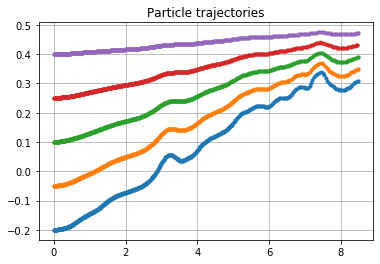

In [26]:
plotTrajectoriesFile('test8.nc');

In [21]:
plotTrajectoriesFile('test7.nc',
                     tracerfile=filenames,
                     tracerlon='X',
                     tracerlat='Y',
                     tracerfield='U');

ValueError: could not broadcast input array from shape (61,100,900) into shape (1,100,900)

Now, we are going to try to release the particles close to the bottom boundary